# <font color=blue> Analyzing Spotify Audio Features Impact on Song Popularity</font> 

## Introduction: 

# Table of Contents: 
1. Data Preparation and Cleaning: Spotify 30,000 songs & Billboard top 100
2. Data Exploration
3. Correlation of Audio features: Do any of the audio features relate to one another? 
4. Logistic Regression Analysis of Audio features: Which Audio features are the most statistically significant?
5. Predicting Song Success using KNN Modeling & Decision Trees

## <font color=blue> 1. Data Preparation & Cleaning </font> 
#### Starting with the spotify_songs dataset, first its necessary to get aquainted with the data types, features, rows & columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re 
spotify = pd.read_csv('spotify_songs.csv')

In [2]:
spotify.shape #rows & columns

(32833, 23)

In [3]:
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

### Cleaning the spotify data: 
#### This dataset had a combination of nulls but also had blank columns (" "). To clean this:
- counted and sorted the number of null values per column & identified rows where specific columns 'track_artist''track_album_name' or 'track_name' were null
- blanks were counted and sorted in the same way.
- a dataFrame was created to summarize the counts of nulls/blanks 
- replaced all blank values with NaN to combine the data 
- dropped all Nan values

In [6]:
null_counts = spotify.isnull().sum().sort_values(ascending = False) #grouping null values together

In [7]:
missing_data_rows = spotify[spotify['track_artist'].isnull() | spotify['track_album_name'].isnull() | spotify['track_name'].isnull()]

In [8]:
blank_counts = (spotify == '').sum().sort_values(ascending=False)
blank_counts

track_id                    0
energy                      0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
key                         0
danceability                0
track_name                  0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_name            0
track_album_id              0
track_popularity            0
track_artist                0
duration_ms                 0
dtype: int64

In [9]:
missing_data = pd.DataFrame({'nulls': null_counts, 'blanks': blank_counts})
missing_data

,nulls,blanks
acousticness,0,0
danceability,0,0
duration_ms,0,0
energy,0,0
instrumentalness,0,0
key,0,0
liveness,0,0
loudness,0,0
mode,0,0
playlist_genre,0,0


In [10]:
spotify.replace('', np.nan, inplace=True)
spotify.dropna(inplace=True)

In [11]:
spotify.dropna(subset=['track_name'], inplace=True) #dropping the 5 tracks with missing information

In [12]:
spotify.dropna(subset=['track_artist', 'track_album_name'], inplace=True) #dropping rows where there is missing features

## Cleaning Columns & Rows: 

- was unnecessary to keep any of the spotify id's (playlist, track id, playlist id)
- track-related strings needed to be reformatted so that it would be consistent with the Billboard data table. 
- for track_name & track_artist: removed parentheses, dashes and reformatted apostrophes (some were ' & `)
- applied the cleaned names to their corresponding columns

In [13]:
spotify.drop(['track_id', 'track_album_id','playlist_id'], axis=1, inplace=True) # dropping id's, they are only relevant keys for spotify data

In [14]:
spotify.drop(['playlist_name'],axis=1, inplace=True) # dropping playlist name, not relevant

In [15]:
def clean_track_name(song):
    song = re.sub(r"\-.*|[\(\[].*?[\)\]]", '', song).lower().strip()  # removing parentheses, brackets, dashes
    song = re.sub(r'’', '\'', song)  # formatting apostrophes to be consistent
    return song

# applying the cleaned track name to the 'track_name' column
spotify['track_name'] = spotify['track_name'].apply(clean_track_name)

In [16]:
def clean_track_artist(artist):
    artist = re.sub(r"\-.*|[\(\[].*?[\)\]]", '', artist).lower().strip()  # removing parentheses, brackets, dashes
    artist = re.sub(r'’', '\'', artist)  # formatting apostrophes to be consistent
    return artist

# applying the cleaned track name to the 'track_name' column
spotify['track_artist'] = spotify['track_artist'].apply(clean_track_artist)

In [17]:
#spotify.to_csv('cleaned_spotify.csv', index=False)

#### Moving on to Billboard Top 100 data. Data was imported, investigated and datatypes were reviewed

In [18]:
billboard = pd.read_csv('hot100.csv')

In [19]:
billboard.describe()

,Rank,Last Week,Peak Position
count,341587.000000,341587.000000,341587.000000
mean,50.500906,50.563818,33.061323
std,28.866097,28.938517,27.765477
min,1.000000,1.000000,1.000000
25%,26.000000,25.000000,7.000000
50%,51.000000,51.000000,28.000000
75%,76.000000,76.000000,56.000000
max,100.000000,100.000000,100.000000


In [20]:
billboard.shape

(341587, 8)

In [21]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341587 entries, 0 to 341586
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             341587 non-null  object
 1   Song             341587 non-null  object
 2   Artist           341587 non-null  object
 3   Rank             341587 non-null  int64 
 4   Last Week        341587 non-null  int64 
 5   Peak Position    341587 non-null  int64 
 6   Weeks in Charts  341587 non-null  object
 7   Image URL        341587 non-null  object
dtypes: int64(3), object(5)
memory usage: 20.8+ MB


## Nulls & Blanks:
- the same process as above was actioned for the billboard data
- no blanks or nulls were found

In [22]:
null_counts_billboard = billboard.isnull().sum().sort_values(ascending = False) # grouping nulls

In [23]:
blank_counts_billboard = (billboard == '').sum().sort_values(ascending=False) # grouping blanks

In [24]:
blank_counts_billboard

Date               0
Song               0
Artist             0
Rank               0
Last Week          0
Peak Position      0
Weeks in Charts    0
Image URL          0
dtype: int64

In [25]:
missing_billboard_data = pd.DataFrame({'nulls': null_counts_billboard, 'blanks': blank_counts_billboard}) #joining nulls and blanks

In [26]:
missing_billboard_data # no nulls or blanks found

,nulls,blanks
Date,0,0
Song,0,0
Artist,0,0
Rank,0,0
Last Week,0,0
Peak Position,0,0
Weeks in Charts,0,0
Image URL,0,0


### Cleaning Columns & Rows: similar approach to the spotify data
- track-related strings needed to be reformatted so that it would be consistent with the spotify data table.
- for song & artist: removed parentheses, dashes and reformatted apostrophes (some were ' & `)
- applied the cleaned names to their corresponding columns
- dropped the image_url column, unnecessary for the analysis
- renamed the song and artist columns to "track_name" & "track_artist" to match the spotify data for the join


In [27]:
def clean_song_name(song):
    song = re.sub(r"\-.*|[\(\[].*?[\)\]]", '', song).lower().strip()  # removing parentheses, brackets, dashes
    song = re.sub(r'’', '\'', song)  # formatting apostrophes to be consistent
    return song


# applying the cleaned song name to the 'song' column
billboard['Song'] = billboard['Song'].apply(clean_song_name)

In [28]:
def clean_artist(artist):
    artist = re.sub(r"\-.*|[\(\[].*?[\)\]]", '', artist).lower().strip()  # removing parentheses, brackets, dashes
    artist = re.sub(r'’', '\'', artist)  # formatting apostrophes to be consistent
    return artist

# applying the cleaned track name to the 'track_name' column
billboard['Artist'] = billboard['Artist'].apply(clean_track_artist)

In [29]:
billboard.drop(['Image URL'], axis=1, inplace=True)

In [30]:
billboard

,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts
0,1958-08-06,poor little fool,ricky nelson,1,1,1,2
1,1958-08-06,nel blu dipinto di blu,domenico modugno,2,54,2,2
2,1958-08-06,patricia,perez prado and his orchestra,3,2,2,2
3,1958-08-06,splish splash,bobby darin,4,3,3,2
4,1958-08-06,when,kalin twins,5,5,5,2
...,...,...,...,...,...,...,...
341582,2024-01-31,sensational,chris brown featuring davido & lojay,96,96,1,-
341583,2024-01-31,when it comes to you,fridayy,97,97,2,-
341584,2024-01-31,idgaf,tee grizzley| mariah the scientist & chris brown,98,98,2,-
341585,2024-01-31,save me the trouble,dan + shay,99,78,38,13


In [31]:
# billboard.to_csv('cleaned_billboard.csv', index=False)

In [32]:
# reanming the billboard columns to match them to spotify data
billboard.rename(columns={'Song': 'track_name', 'Artist': 'track_artist'}, inplace=True)

### Combining of both datasets
- spotify and billboard DataFrames on columns 'track_artist' and 'track_name' using a left join. Columns with the same name in both DataFrames are suffixed with '_spotify' and '_billboard'
- new column 'track_key' is created by concatenating the 'track_name' and 'track_artist' columns
- columns are reordered to place 'track_key' as the first column
- new column 'Charted_On_Billboard' added to indicate whether a track has charted on Billboard. It checks if the 'Rank' column is not null. If 'Rank' is not null then value is set to 1 otherwise, it is set to 0

In [33]:
merged_df = pd.merge(spotify, billboard, on=['track_artist', 'track_name'], how='left', suffixes=('_spotify', '_billboard')) #merging tables

In [34]:
merged_df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,duration_ms,Date,Rank,Last Week,Peak Position,Weeks in Charts
0,i don't care,ed sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,dance pop,0.748,0.916,6,...,0.000000,0.0653,0.5180,122.036,194754,NaN,NaN,NaN,NaN,NaN
1,memories,maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,0.815,11,...,0.004210,0.3570,0.6930,99.972,162600,2019-10-02,22.0,22.0,1.0,-
2,memories,maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,0.815,11,...,0.004210,0.3570,0.6930,99.972,162600,2019-10-09,29.0,22.0,22.0,2
3,memories,maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,0.815,11,...,0.004210,0.3570,0.6930,99.972,162600,2019-10-16,20.0,29.0,20.0,3
4,memories,maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,dance pop,0.726,0.815,11,...,0.004210,0.3570,0.6930,99.972,162600,2019-10-23,12.0,20.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145890,closer,tegan and sara,20,Closer Remixed,2013-03-08,edm,progressive electro house,0.522,0.786,0,...,0.004270,0.3750,0.4000,128.041,353120,2013-11-06,97.0,90.0,90.0,2
145891,closer,tegan and sara,20,Closer Remixed,2013-03-08,edm,progressive electro house,0.522,0.786,0,...,0.004270,0.3750,0.4000,128.041,353120,2013-11-13,96.0,97.0,90.0,3
145892,sweet surrender,starkillers,14,Sweet Surrender (Radio Edit),2014-04-21,edm,progressive electro house,0.529,0.821,6,...,0.000001,0.1500,0.4360,127.989,210112,NaN,NaN,NaN,NaN,NaN
145893,only for you,mat zo,15,Only For You (Remixes),2014-01-01,edm,progressive electro house,0.626,0.888,2,...,0.127000,0.3430,0.3080,128.008,367432,NaN,NaN,NaN,NaN,NaN


In [35]:
#merged_df.to_csv('merged_df.csv', index=False) ## investigating in excel

In [36]:
#to group tracks by a common key 
merged_df['track_key'] = merged_df['track_name'] + "_" + merged_df['track_artist'].astype(str)

In [37]:
print(merged_df[['track_key', 'track_name', 'track_artist']].head())

                 track_key    track_name track_artist
0  i don't care_ed sheeran  i don't care   ed sheeran
1        memories_maroon 5      memories     maroon 5
2        memories_maroon 5      memories     maroon 5
3        memories_maroon 5      memories     maroon 5
4        memories_maroon 5      memories     maroon 5


In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145895 entries, 0 to 145894
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_name                145895 non-null  object 
 1   track_artist              145895 non-null  object 
 2   track_popularity          145895 non-null  int64  
 3   track_album_name          145895 non-null  object 
 4   track_album_release_date  145895 non-null  object 
 5   playlist_genre            145895 non-null  object 
 6   playlist_subgenre         145895 non-null  object 
 7   danceability              145895 non-null  float64
 8   energy                    145895 non-null  float64
 9   key                       145895 non-null  int64  
 10  loudness                  145895 non-null  float64
 11  mode                      145895 non-null  int64  
 12  speechiness               145895 non-null  float64
 13  acousticness              145895 non-null  f

In [39]:
#moving the track_key to the first column
cols = ['track_key'] + [col for col in merged_df.columns if col != 'track_key']
merged_df = merged_df[cols]

In [40]:
# Create a new column 'Charted_On_Billboard' to indicate whether a track has Billboard chart information
merged_df['Charted_On_Billboard'] = pd.notnull(merged_df['Rank']).astype(int)

/var/folders/n8/pvc0chq55f1b8jwl04qt5h_40000gn/T/ipykernel_32863/1896275007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Charted_On_Billboard'] = pd.notnull(merged_df['Rank']).astype(int)


In [41]:
print(merged_df[['track_key', 'Rank', 'Charted_On_Billboard']].head())

                 track_key  Rank  Charted_On_Billboard
0  i don't care_ed sheeran   NaN                     0
1        memories_maroon 5  22.0                     1
2        memories_maroon 5  29.0                     1
3        memories_maroon 5  20.0                     1
4        memories_maroon 5  12.0                     1


In [42]:
#merged_df.to_csv('merged_df_080224.csv', index= False)

# Table organising and transformation
- divided the merged dataFrame into 2 dataframes based on whether the tracks charted on Billboard or not. charted_tracks ares all tracks that have a Charted_On_Billboard value of 1 and non_charted_songs contains tracks with a Charted_On_Billboard value of 0
- for tracks that have charted on Billboard, highest_rank_df is created by first grouping charted_tracks by 'track_key' and then selecting the row with the minimum (highest) rank within each group
- uncharted_tracks_df is created by selecting rows from merged_df where the 'Rank' column is null, indicating these tracks did not chart on Billboard.
- complete_songs dataFrame is created by concatenating highest_rank_df and uncharted_tracks_df combining the tracks to their highest Billboard chart performance and tracks that never charted. Each track is represented once based on its best chart performance or its status as an uncharted track
- for each track, there were still multiple rows for the same song caused by multiple track_release_dates, multiple playlist_genres and playlist_subgenres, to address this, dummy variables for genres and subgenres were created.
- took the minimum date of the track and dropped later track releases of the same songs. 

In [43]:
merged_df.shape

(145895, 26)

In [50]:
# Grouping charted vs uncharted for comparison of the audio features
charted_tracks = merged_df[merged_df['Charted_On_Billboard'] == 1]

In [51]:
non_charted_songs =merged_df[merged_df['Charted_On_Billboard'] == 0]

In [52]:
highest_rank_df = charted_tracks.loc[charted_tracks.groupby('track_key')['Rank'].idxmin()]

In [53]:
highest_rank_df

,track_key,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,...,liveness,valence,tempo,duration_ms,Date,Rank,Last Week,Peak Position,Weeks in Charts,Charted_On_Billboard
120142,'til you do me right_after 7,'til you do me right,after 7,39,The Very Best Of After 7,1997-01-01,r&b,new jack swing,0.612,0.542,...,0.0763,0.433,76.744,294600,1995-10-04,31.0,33.0,31.0,14,1
2634,...baby one more time_britney spears,...baby one more time,britney spears,75,...Baby One More Time (Digital Deluxe Version),1999-01-12,pop,dance pop,0.759,0.699,...,0.4430,0.907,92.960,211067,1999-01-27,1.0,3.0,1.0,11,1
135621,...ready for it?_taylor swift,...ready for it?,taylor swift,50,...Ready For It? (BloodPop® Remix),2017-12-01,edm,pop edm,0.582,0.835,...,0.1020,0.496,160.090,189509,2017-09-20,4.0,4.0,1.0,-,1
104801,0 to 100 / the catch up_drake,0 to 100 / the catch up,drake,5,0 To 100 / The Catch Up,2013-07-14,r&b,urban contemporary,0.559,0.716,...,0.2520,0.504,176.618,275227,2014-09-17,35.0,44.0,35.0,7,1
101831,1 thing_amerie,1 thing,amerie,59,Touch,2005,r&b,urban contemporary,0.612,0.961,...,0.0413,0.867,129.873,238760,2005-04-20,8.0,16.0,8.0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52250,youth of the nation_p.o.d.,youth of the nation,p.o.d.,69,Satellite (U.S. Version WEA Distribution),2001-09-11,rock,album rock,0.563,0.860,...,0.3900,0.517,97.867,256240,2002-04-03,28.0,30.0,28.0,9,1
141824,youth_troye sivan,youth,troye sivan,67,Blue Neighbourhood (Deluxe),2015-12-04,edm,pop edm,0.628,0.737,...,0.0777,0.592,91.507,185194,2016-03-30,23.0,58.0,23.0,7,1
33471,yuck_logic,yuck,logic,58,Bobby Tarantino II,2018-03-09,rap,hip hop,0.619,0.798,...,0.1700,0.710,156.151,173693,2018-03-21,87.0,87.0,1.0,-,1
1902,yummy_justin bieber,yummy,justin bieber,95,Yummy,2020-01-03,pop,dance pop,0.662,0.519,...,0.1210,0.495,145.841,210427,2020-01-15,2.0,2.0,1.0,-,1


In [55]:
uncharted_tracks_df = merged_df[pd.isnull(merged_df['Rank'])]

In [282]:
uncharted_tracks_df

,track_key,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,...,post-teen pop,progressive electro house,r&b,rap,reggaeton,rock,southern hip hop,trap,tropical,urban contemporary
0,"""i tried for years... nobody listened""_iceberg...","""i tried for years... nobody listened""",iceberg black,18,WAR,2018-09-22,0.914,0.408,10,-6.712,...,0,0,0,1,0,0,0,0,0,0
1,"""this is seagull….""_the snake corps","""this is seagull….""",the snake corps,34,Smother Earth,1990-01-01,0.516,0.580,9,-13.288,...,0,0,0,0,0,0,0,0,0,0
2,#1 stunna_big tymers,#1 stunna,big tymers,48,I Got That Work,2000-01-01,0.552,0.842,8,-4.961,...,0,0,0,1,0,0,1,0,0,0
3,#nakama_xlii,#nakama,xlii,26,#NAKAMA,2019-12-25,0.797,0.970,3,-3.204,...,0,0,1,0,0,0,0,0,0,0
4,#natural_paty cantú,#natural,paty cantú,50,#Natural,2017-10-20,0.800,0.836,0,-3.535,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24768,숙녀 lady_yubin,숙녀 lady,yubin,17,都市女子,2018-06-05,0.473,0.973,9,-3.378,...,0,0,1,0,0,0,0,0,0,0
24769,쉼표_kozypop,쉼표,kozypop,30,"Seoul Vibes, Pt​. 4",2018-10-01,0.429,0.724,3,-4.144,...,0,0,0,0,0,0,0,0,0,0
24770,중독 overdose_exo,중독 overdose,exo,4,The 2nd Mini Album '중독 Overdose',2014-08-06,0.498,0.917,5,-1.797,...,0,0,0,0,0,0,0,0,0,0
24771,피카부 peek_red velvet,피카부 peek,red velvet,70,Perfect Velvet - The 2nd Album,2017-11-17,0.839,0.902,1,-3.612,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#uncharted_tracks_df.to_csv('uncharted_tracks_df.csv', index= False)

In [57]:
complete_songs = pd.concat([highest_rank_df, uncharted_tracks_df], ignore_index=True)

In [60]:
complete_songs.to_csv('complete_songs.csv', index = False)

In [61]:
# Load your data
songs = pd.read_csv('complete_songs.csv')

# Create dummy variables for both 'playlist_genre' and 'playlist_subgenre'
genre_dummies = pd.get_dummies(songs['playlist_genre'])
subgenre_dummies = pd.get_dummies(songs['playlist_subgenre'])

# Concatenate dummy variables with the original dataframe
df_combined = pd.concat([songs, genre_dummies, subgenre_dummies], axis=1)


In [62]:
# Drop the original categorical columns
df_combined = df_combined.drop(['playlist_genre', 'playlist_subgenre'], axis=1)

# Convert 'track_album_release_date' to datetime format
df_combined['track_album_release_date'] = pd.to_datetime(df_combined['track_album_release_date'], errors='coerce')

# Sum the dummy variables for both 'playlist_genre' and 'playlist_subgenre'
dummies_summed = df_combined.groupby('track_key')[genre_dummies.columns.union(subgenre_dummies.columns)].sum().reset_index()

# Sort the DataFrame by 'track_key' and 'track_album_release_date'
df_sorted = df_combined.sort_values(by=['track_key', 'track_album_release_date'])

# Drop duplicates, keeping the first occurrence for each 'track_key'
df_min_date = df_sorted.drop_duplicates(subset='track_key')

# Drop dummy columns from df_min_date
df_min_date = df_min_date.drop(columns=genre_dummies.columns.union(subgenre_dummies.columns))

# Merge with the summed dummies dataframe
final_df = pd.merge(df_min_date, dummies_summed, on='track_key')

# Convert aggregated values to binary for both sets of dummy columns
final_df[genre_dummies.columns.union(subgenre_dummies.columns)] = final_df[genre_dummies.columns.union(subgenre_dummies.columns)].clip(upper=1)

In [63]:
final_df.head()

,track_key,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,...,post-teen pop,progressive electro house,r&b,rap,reggaeton,rock,southern hip hop,trap,tropical,urban contemporary
0,"""i tried for years... nobody listened""_iceberg...","""i tried for years... nobody listened""",iceberg black,18,WAR,2018-09-22,0.914,0.408,10,-6.712,...,0,0,0,1,0,0,0,0,0,0
1,"""this is seagull….""_the snake corps","""this is seagull….""",the snake corps,34,Smother Earth,1990-01-01,0.516,0.580,9,-13.288,...,0,0,0,0,0,0,0,0,0,0
2,#1 stunna_big tymers,#1 stunna,big tymers,48,I Got That Work,2000-01-01,0.552,0.842,8,-4.961,...,0,0,0,1,0,0,1,0,0,0
3,#nakama_xlii,#nakama,xlii,26,#NAKAMA,2019-12-25,0.797,0.970,3,-3.204,...,0,0,1,0,0,0,0,0,0,0
4,#natural_paty cantú,#natural,paty cantú,50,#Natural,2017-10-20,0.800,0.836,0,-3.535,...,0,0,0,0,0,0,0,0,0,0


In [66]:
highest_rank_df = final_df[final_df['Charted_On_Billboard'] == 1]
uncharted_tracks_df = final_df[final_df['Charted_On_Billboard'] == 0]


## <font color=blue> 2. Data Exploration </font> 
### Visualizing & comparing the distribution of audio features between charted and uncharted tracks
- histograms for highest_rank_df & uncharted_tracks_df provide a high level overview distribution for all numeric columns within both datasets. The reason for this is to help identify differences in distribution characteristics
- since we are comparing its necessary to normalize the audio features. Usinng density normalization ensures that the area under each histogram sums to 1 allowing for an easier comparison 
### Findings: 
- danceability:  distribution of uncharted tracks shows a range slightly higher towards 1. Charted tracks are slightly more densely distributed in the 0.4-0.7 range. It could suggest that charted tracks with danceability values in this range are more common
- energy: similarly to the danceability histogram, uncharted tracks show a range towards the higher end as well. Charted songs tend to have a presence in the lower values, with a bit of a wider range. 
- key: across all tracks there tends to be a lower prevalence in the 3rd key, which corresponds to D#. The highest peaks are in keys 0 and 1 (C and C#) for both charted and uncharted. Key 7 & 9 which are keys G and A respectively, are also more prevalent across both charted and uncharted tracks.
- loudness: this tends to be distributed towards the highest end of the scale. Charted tracks tend to have a higher concentration between -15 and -5. Whereas the uncharted tracks have a wider range. 
- mode: this is a binary variable. 1 indicates the track is on the major scale and 0 is the minor scale. Charted tracks have tend to peak in the major scale and uncharted tracks tend to have higher prevalence in the minor scale.
- speechiness: the distribution for both tracks are on the lower end. This makes logical sense because, tracks that are over the value of 0.66 suggest that the track is almost entirely spoek word (like an audiobook). Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. The distribution tends to be below 0.33 which suggests that songs have music and non-speech-like elements. 
- acousticness: both chaarted and uncharted tracks tend to be distributed on the lower end of the scale, suggesting that the majority of the tracks for this dataset have low levels of acousticness
- instrumentalness: he majority of tracks in this dataset have low instrumentalness, which means they likely contain vocal elements. The concentration of values near 0 suggests few tracks are mainly instrumental.
- liveness: the majority of tracks are distributed towards the lower end, suggesting that most tracks are not recorded live.
- valence: the dsitribution of charted and uncharted tracks ranges widely. with charted tracks being slightly positively skewed and uncharted being slightly negatively skewed. 
- tempo: the range for both charted and uncharted tracks lies between 75-150 bpm. This suggests that perhaps mainstream music is within this range. 
- duration_ms: charted songs range towards the higher values and uncharted are slightly shorter in range. This dataset suggests that charted songs are slightly longer than uncharted songs. 



In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

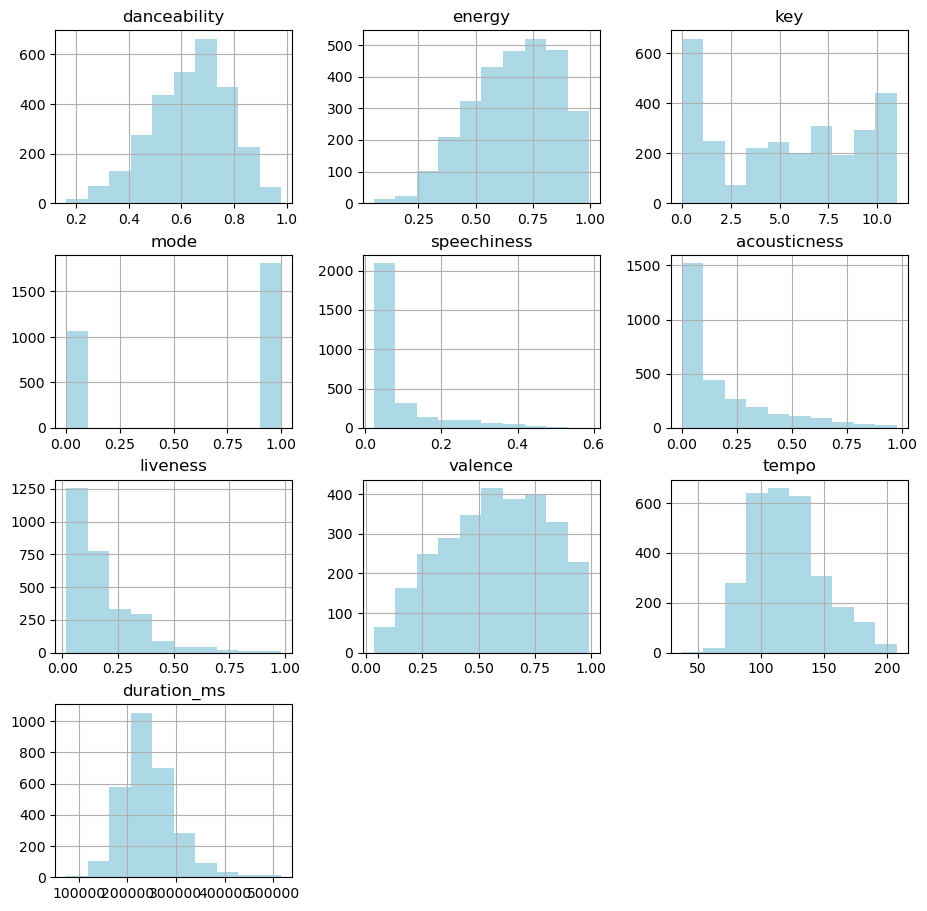

In [68]:
highest_rank_df[['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']].hist(figsize=(11, 11), color='lightblue');


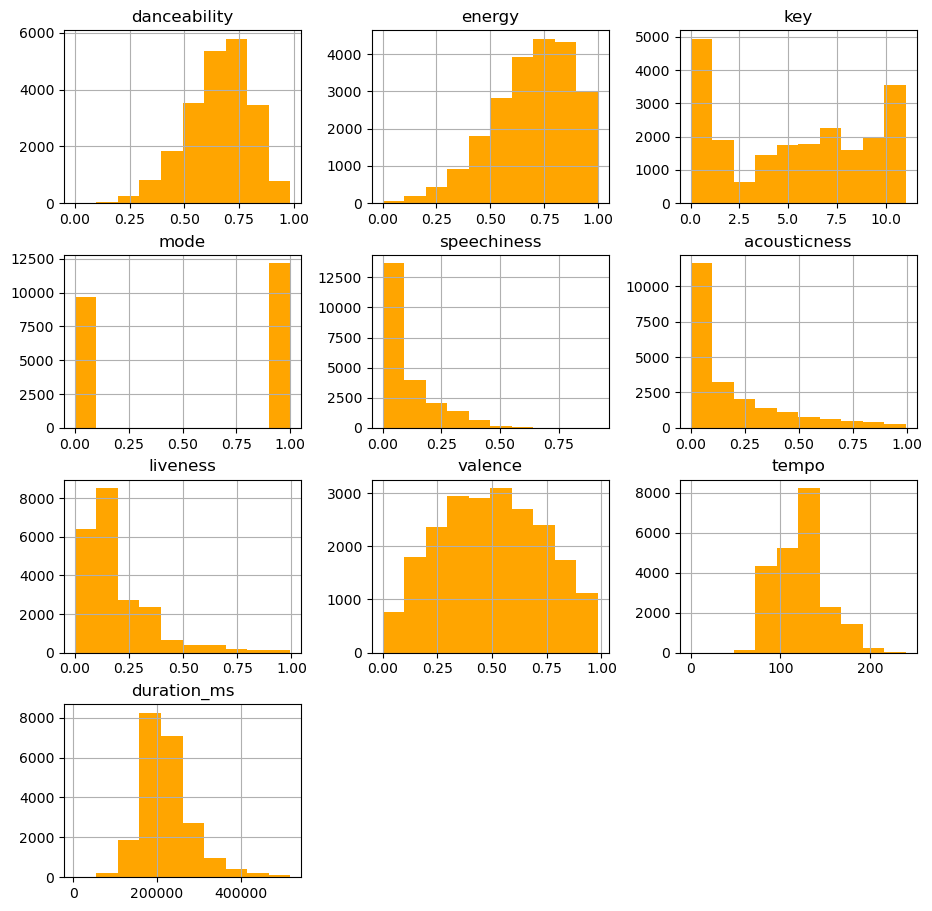

In [69]:
uncharted_tracks_df[['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']].hist(figsize=(11, 11), color='orange');


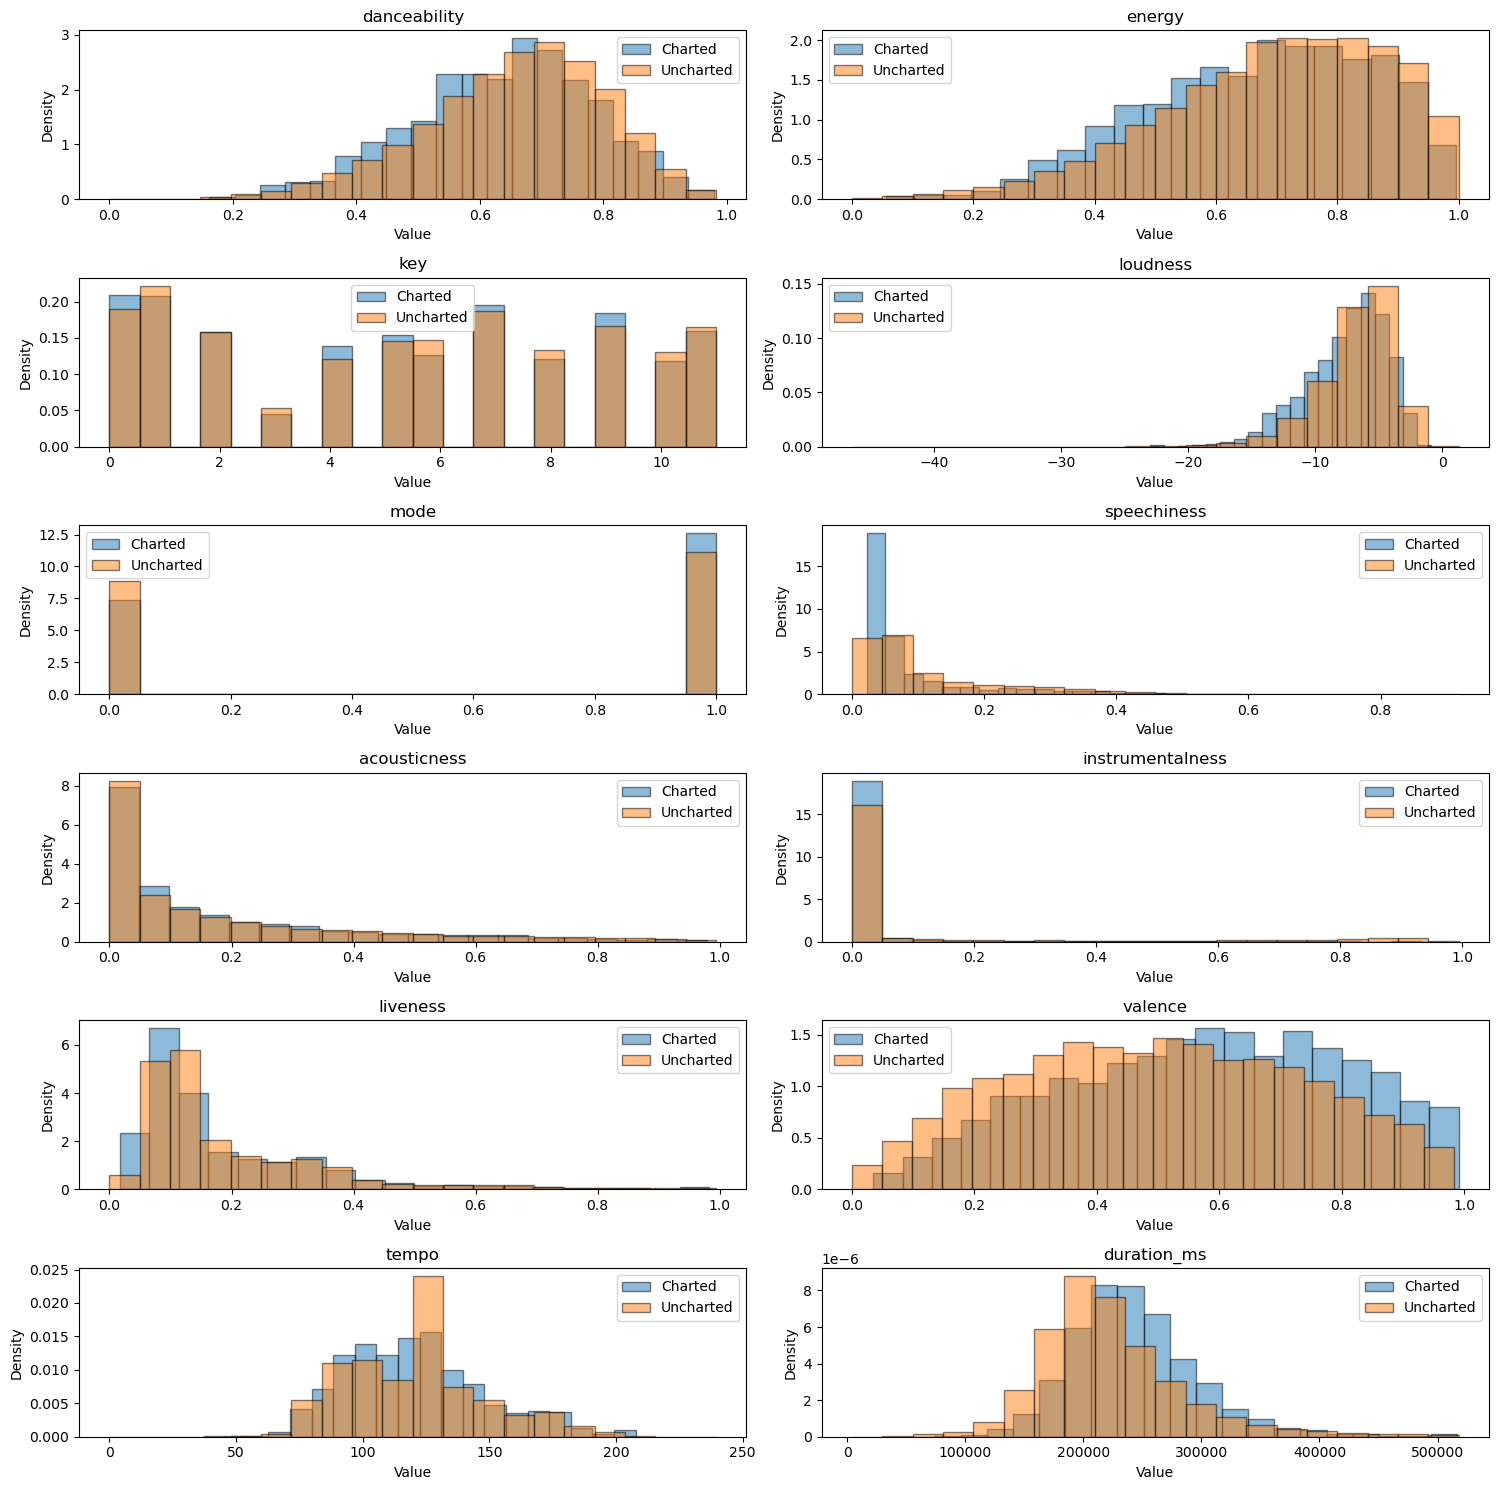

In [70]:
import matplotlib.pyplot as plt

def plot_comparison_for_fixed_features(charted_df, uncharted_df):
    features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
    
    fig, axs = plt.subplots(6, 2, figsize=(15, 15))
    axs = axs.flatten()

    for i in range(len(features)):
        feature = features[i]
        ax = axs[i]
        
        ax.hist(charted_df[feature], alpha=0.5, label='Charted', bins=20, edgecolor='black', density=True)
        ax.hist(uncharted_df[feature], alpha=0.5, label='Uncharted', bins=20, edgecolor='black', density=True)

        ax.set_title(f'{feature}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()

    plt.tight_layout()
    plt.show()
plot_comparison_for_fixed_features(highest_rank_df, uncharted_tracks_df)


## <font color=blue>3. Correlation matrix of audio features </font> 
- determining how audio features relate to one another is important to consider
- created a correlation matrix to evaluate the relationship between two audio features
### Findings: 
- Loudness & Energy are highly correlated (corr value: 0.676662) suggesting that there is a postive relationship between these two features. This makes sense because energy is based on perceptual features such as dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Valence & Danceability are moderately positively correlated (corr value: 0.330538). This isn't surprising but perhaps not obviously apparent at first. Danceability is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity and valence is whether a song is musically postive or negative based on machine learning methods. So having a song that is more postive couldd reasonably suggest that it would be more danceable.
- Acousticness and Energy are the most negatively correlated (corr value: 0.539732). This is reasonable since acoustic tracks would generally lack loudness, or energy or timbre. We could infer that acousticness is less processed and have a more natural sound
- Acousticness & Loudness are also moderately negatively correlated (corr value: 0.361646). Same as the suggested above, acoustic songs would generally be quieter due to the limit of instruments, production elements


/Users/corbingirard/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


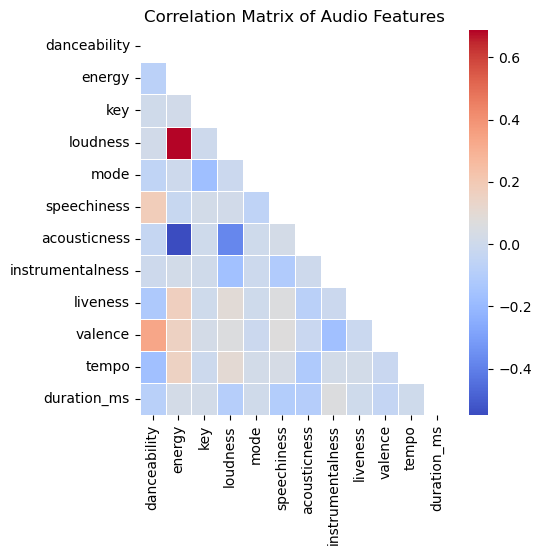

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

audio_features= ['danceability', 'energy', 'key', 'loudness', 'mode',
          'speechiness', 'acousticness', 'instrumentalness',
          'liveness', 'valence', 'tempo', 'duration_ms']
audio_features_df = final_df[audio_features] 

corr_matrix = audio_features_df.corr()

plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='coolwarm', linewidths=.5, cbar=True)

plt.title('Correlation Matrix of Audio Features')
plt.show()

In [72]:
corr_matrix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,-0.072722,0.008132,0.015194,-0.055748,0.182398,-0.034806,-0.000026,-0.124585,0.335511,-0.172057,-0.083455
energy,-0.072722,1.000000,0.013305,0.686688,-0.003870,-0.023380,-0.549594,0.018726,0.169031,0.157202,0.152382,0.021449
key,0.008132,0.013305,1.000000,-0.000295,-0.176010,0.018131,0.004888,0.006639,0.002705,0.022915,-0.007760,0.018892
loudness,0.015194,0.686688,-0.000295,1.000000,-0.013449,0.013603,-0.376884,-0.165471,0.089168,0.063617,0.099659,-0.092817
mode,-0.055748,-0.003870,-0.176010,-0.013449,1.000000,-0.057028,0.005125,-0.006423,0.001277,-0.009339,0.015964,0.008223
speechiness,0.182398,-0.023380,0.018131,0.013603,-0.057028,1.000000,0.022571,-0.114510,0.061303,0.072102,0.033283,-0.101304
acousticness,-0.034806,-0.549594,0.004888,-0.376884,0.005125,0.022571,1.000000,-0.002037,-0.077473,-0.021038,-0.117590,-0.096677
instrumentalness,-0.000026,0.018726,0.006639,-0.165471,-0.006423,-0.114510,-0.002037,1.000000,-0.012200,-0.170460,0.017636,0.060797
liveness,-0.124585,0.169031,0.002705,0.089168,0.001277,0.061303,-0.077473,-0.012200,1.000000,-0.016016,0.018311,0.001880
valence,0.335511,0.157202,0.022915,0.063617,-0.009339,0.072102,-0.021038,-0.170460,-0.016016,1.000000,-0.019319,-0.041560


In [73]:
corr_matrix.to_csv('corr_matrix.csv', index=True)

In [74]:
highest_rank_df.describe()

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,post-teen pop,progressive electro house,r&b,rap,reggaeton,rock,southern hip hop,trap,tropical,urban contemporary
count,2877.000000,2446,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,...,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,49.384081,2001-10-04 23:21:44.006541312,0.635195,0.670335,5.324644,-7.639019,0.629475,0.085179,0.176227,0.023911,...,0.115746,0.003476,0.224192,0.130344,0.002086,0.337157,0.062218,0.007647,0.003476,0.064303
min,0.000000,1963-03-22 00:00:00,0.162000,0.056100,0.000000,-23.035000,0.000000,0.022400,0.000005,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1991-10-31 12:00:00,0.540000,0.537000,2.000000,-9.637000,0.000000,0.034700,0.019200,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,2004-11-25 12:00:00,0.651000,0.692000,5.000000,-7.019000,1.000000,0.047700,0.084600,0.000007,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,2014-01-01 00:00:00,0.741000,0.821000,9.000000,-5.173000,1.000000,0.087900,0.259000,0.000966,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,2020-01-17 00:00:00,0.979000,0.996000,11.000000,-0.905000,1.000000,0.588000,0.979000,0.982000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,25.349577,NaN,0.147969,0.184847,3.615123,3.243556,0.483029,0.088638,0.212650,0.105609,...,0.319975,0.058864,0.417122,0.336740,0.045628,0.472821,0.241592,0.087126,0.058864,0.245335


In [75]:
uncharted_tracks_df.describe()

,track_popularity,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,post-teen pop,progressive electro house,r&b,rap,reggaeton,rock,southern hip hop,trap,tropical,urban contemporary
count,21896.000000,20992,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,...,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000,21896.000000
mean,38.044118,2014-04-23 08:55:11.890243840,0.656826,0.696180,5.380435,-6.788054,0.556357,0.113293,0.185275,0.106722,...,0.030554,0.075174,0.172269,0.217665,0.036765,0.118926,0.063391,0.055307,0.055718,0.050420
min,0.000000,1957-01-01 00:00:00,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2013-06-03 00:00:00,0.566000,0.578000,2.000000,-8.249000,0.000000,0.042200,0.014400,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,2017-09-08 00:00:00,0.674000,0.719000,6.000000,-6.243000,1.000000,0.066300,0.084350,0.000026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,2019-06-14 00:00:00,0.763000,0.842000,9.000000,-4.712000,1.000000,0.145000,0.277000,0.011300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,2020-01-29 00:00:00,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,22.492049,NaN,0.145658,0.185663,3.612018,3.029136,0.496825,0.105987,0.230414,0.251165,...,0.172109,0.263677,0.377623,0.412668,0.188188,0.323709,0.243670,0.228584,0.229381,0.218815


## <font color=blue>4.Logistic regression for audio features</font> 
### A logistic regression analysis performed to determine which audio features infleunce the likelihood a song would chart on the billboard
- instrumentalness: coefficient of-0.769385 has the highest weights of contributing to a songs success. It is a negative value meaning that as  a song becomes more instrumental (less vocal), the probability of it charting decreases.
- valence: coefficient of 0.431116, with the highes positive coefficient suggests that it has the second highest probability of contributing to a songs success. Its positive values means that as when the song sounds more positive (happier), it increases its chances of charting.
- loudness and speechiness: these features have negative coefficients but they are not as influential as instrumentalness. This suggests that as songs become louder and more speech-like, they may slightly decrease the charting potential. The effect is smaller compared to instrumentalness.
- Duration has a positive value, and as a song gets longer it could contribute to the probability of a songs billboard charting potential. 

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']
target = 'Charted_On_Billboard'

X = final_df[features]
y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() # instantiate and fit. Must scale features 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# coefficients to understand the impact of each feature
coefficients = pd.DataFrame(model.coef_[0], index=features, columns=['Coefficient'])
coefficients['Absolute'] = coefficients['Coefficient'].abs()
coefficients['Significance'] = coefficients['Absolute'].apply(lambda x: 'Strong' if x > 0 else 'Weak')

coefficients.sort_values('Absolute')

,Coefficient,Absolute,Significance
tempo,-0.003709,0.003709,Strong
key,0.016814,0.016814,Strong
liveness,-0.028892,0.028892,Strong
energy,-0.104536,0.104536,Strong
mode,0.114821,0.114821,Strong
acousticness,-0.180788,0.180788,Strong
danceability,-0.219111,0.219111,Strong
loudness,-0.303237,0.303237,Strong
duration_ms,0.322368,0.322368,Strong
speechiness,-0.331680,0.331680,Strong


In [77]:
final_df.to_csv('final_df.csv',index=True)

In [78]:
#finding the p-value for each of the audio features to determine statistical significance

import statsmodels.api as sm

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.324648
         Iterations 8
                           Results: Logit
Model:              Logit                Method:           MLE       
Dependent Variable: Charted_On_Billboard Pseudo R-squared: 0.096     
Date:               2024-02-16 12:25     AIC:              16111.0028
No. Observations:   24773                BIC:              16216.5305
Df Model:           12                   Log-Likelihood:   -8042.5   
Df Residuals:       24760                LL-Null:          -8897.3   
Converged:          1.0000               LLR p-value:      0.0000    
No. Iterations:     8.0000               Scale:            1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -2.9948   0.2507 -11.9467 0.0000 -3.4861 -2.5034
danceability    

In [79]:
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=True)

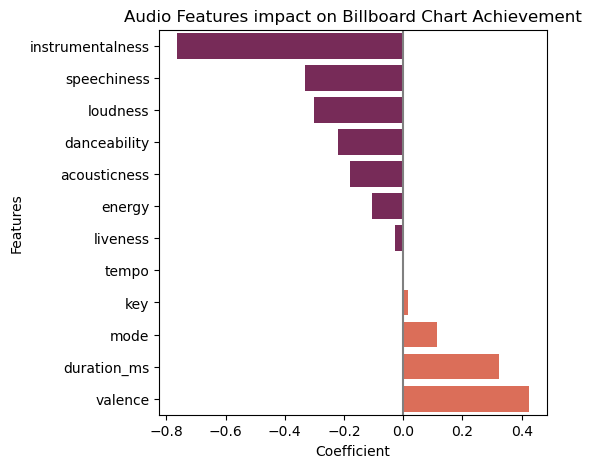

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

rocket_palette = sns.color_palette("rocket", n_colors=2)

colours = [rocket_palette[0] if x < 0 else rocket_palette[1] for x in coefficients_sorted['Coefficient']]

plt.figure(figsize=(5, 5))
sns.barplot(x=coefficients_sorted['Coefficient'], y=coefficients_sorted.index, palette = colours)
plt.title('Audio Features impact on Billboard Chart Achievement')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='grey')

plt.show()

In [81]:
coefficients_sorted.to_csv('feature_importances.csv', index=True)

## <font color=blue>5. Data Modeling: KNN & Decision Trees</font> 
### - Began withh a null model/baseline model to compare following model success

#### Null Model Performance model for audio features

In [82]:
# frequent class: not charted
total_rows = 24773
uncharted_rows = 21896
baseline_accuracy = uncharted_rows / total_rows
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

Baseline Accuracy: 0.8839


#### The initial KNN model is using instrumentalness, valence, loudness, duration in milliseconds, and speechiness as features. They were chosen based on their inter-correlations and their noted impacts on song success as indicated by the logistic regression

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

features = ['instrumentalness', 'valence', 'loudness', 'duration_ms', 'speechiness']  # features
target = 'Charted_On_Billboard'  # target

X = final_df[features]
y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  # Starting with default k as 5

knn.fit(X_train_scaled, y_train)

predictions = knn.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[4265  121]
 [ 511   58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4386
           1       0.32      0.10      0.16       569

    accuracy                           0.87      4955
   macro avg       0.61      0.54      0.54      4955
weighted avg       0.83      0.87      0.84      4955



#### 
- Precision for Charted Class: has a precision of 0.32 for the charted class meaning that when predicting a song as charted, it is correct 32% of the time.
- Recall for Charted Class: the recall for the charted class is 0.10, meaning that the model correctly identifies 10% of the actual charted songs.
- When compared to the baseline model, this model has an accuracy of 0.87, which is slightly below the baseline.

#### this model demonstrated proficiency in classifying songs that have not charted. However, for future iterations of the model, it will be important to address the imbalance between the charted and uncharted classes to improve its prediction

### KNN Model 2: using Smote

In [91]:
from sklearn.metrics import confusion_matrix

X = final_df[features]
y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting 


scaler = StandardScaler() # scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42) #fit smote
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5) #using default 5
knn_model.fit(X_train_smote, y_train_smote)
y_pred = knn_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3138 1248]
 [ 303  266]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      4386
           1       0.18      0.47      0.26       569

    accuracy                           0.69      4955
   macro avg       0.54      0.59      0.53      4955
weighted avg       0.83      0.69      0.74      4955



### Decision Tree: Model 3
##### The KNN model, when optimized, indicated that using n_neighbors=1 provided the best results, this caused concern about overfitting. It may suggest that the dataset may require a more advanced model. Decision Tree used as an alternative. Smote was still used to address imbalance and the same features. 

In [92]:
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier

In [93]:
features = ['speechiness', 'instrumentalness', 'valence', 'tempo', 'duration_ms']
target = 'Charted_On_Billboard'

X = final_df[features]
y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [94]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_smote, y_train_smote)

y_pred = dt_classifier.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[3378 1008]
 [ 370  199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4386
           1       0.16      0.35      0.22       569

    accuracy                           0.72      4955
   macro avg       0.53      0.56      0.53      4955
weighted avg       0.82      0.72      0.76      4955



- Precision for Charted Class: has a precision of 0.16 for the charted class meaning that when predicting a song as charted, it is correct 16% of the time.
- Recall for Charted Class: the recall for the charted class is 0.35, meaning that the model correctly identifies 35% of the actual charted songs.
- When compared to the baseline model, this model has an accuracy of 0.72, which is still below the baseline.


- Attempted to identify feature importance in the model and found duration had the greates importance when looking at the original features

In [95]:
feature_importances = dt_classifier.feature_importances_
importances_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
print(importances_df.sort_values(by='importance', ascending=False))

            feature  importance
4       duration_ms    0.221909
2           valence    0.213943
3             tempo    0.202136
0       speechiness    0.192674
1  instrumentalness    0.169338


### Decision Tree Model: 4
- For the final model, added all the features (including genres and subgenres to see if this would improve the performance             

In [96]:
features = ['key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms', 'album rock', 'big room', 'classic rock', 'dance pop', 'edm', 'electro house', 'electropop', 'gangster rap',
            'hard rock', 'hip hop', 'hip pop', 'indie poptimism', 'latin', 'latin hip hop', 'latin pop', 'neo soul',
            'new jack swing', 'permanent wave', 'pop', 'pop edm', 'post-teen pop', 'progressive electro house', 'r&b',
            'rap', 'reggaeton', 'rock', 'southern hip hop', 'trap', 'tropical', 'urban contemporary']
target = 'Charted_On_Billboard'

X = final_df[features]
y = final_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced') #trainig dt on a balanced dataset
dt_classifier.fit(X_train_smote, y_train_smote)

y_pred = dt_classifier.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[3711  675]
 [ 345  224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4386
           1       0.25      0.39      0.31       569

    accuracy                           0.79      4955
   macro avg       0.58      0.62      0.59      4955
weighted avg       0.84      0.79      0.81      4955



### Model conclusion: 

#### The KNN Model 2 using SMOTE had the highest recall for charting songs, suggesting its potential for identifying hits; however, it still displayed a lower overall accuracy. The expanded feature set in Decision Tree Model 4 also showed some success, but still was unable to perform the baseline model. Future models could focus on better accuracy with the ability to detect charts, possibly looking more into advanced methods or models.